In [1]:
from datasets import load_dataset,  ClassLabel
import torch
import torchvision.transforms.v2 as T
from classes import i2d
from fastai.vision.all import *

In [2]:
ds = load_dataset("zh-plus/tiny-imagenet", split="train", trust_remote_code=True)
ds._info.features['label'] = ClassLabel(names = list(map(i2d.get,ds.features['label'].names)))
ds = ds.map(lambda x: {'image':x['image'].convert('RGB')}, num_proc=4)

In [3]:
ds.set_format('pandas')
df = ds[:]
df.label = df.label.map(ds.features['label'].int2str)

In [4]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_x=ColReader('image'), 
                   get_y=ColReader('label'))
dls = dblock.dataloaders(df,bs = 8)

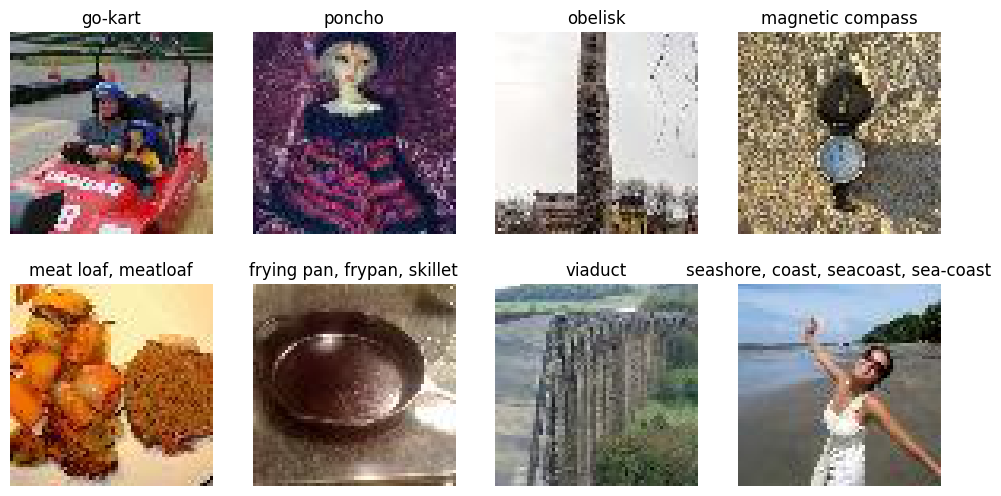

In [5]:
dls.show_batch()

In [ ]:
xb,yb = dls.one_batch()
yb = [o[1] for o in dls.decode_batch((xb,yb))]